## Exploring the algal mortality

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as colors
from copy import copy

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [3]:
region = 'EqPac'
mortality = [0.16, 0.39, 0.5]
runtime = 20                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = 'no'
sizebinedges = [1e-3, 0.5e-3, 1e-4, 1e-5, 1e-6]

In [4]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality[0])[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality[1])[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_2 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality[2])[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [5]:
dslist = [ds_0, ds_1, ds_2]

In [6]:
split_ds_0 = list(ds_0.groupby_bins('r_pl', sizebinedges[::-1]))[::-1]
split_ds_1 = list(ds_1.groupby_bins('r_pl', sizebinedges[::-1]))[::-1]
split_ds_2 = list(ds_2.groupby_bins('r_pl', sizebinedges[::-1]))[::-1]

#### Colormaps

In [7]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']

r_pl_cmap = ['#7a0177', '#c51b8a', '#f768a1', '#fbb4b9']

In [8]:
number_of_trajectories_to_plot = 1000
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 1000 of 10000 trajectories
plotting every 10 particles


/usr/local/lib64/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


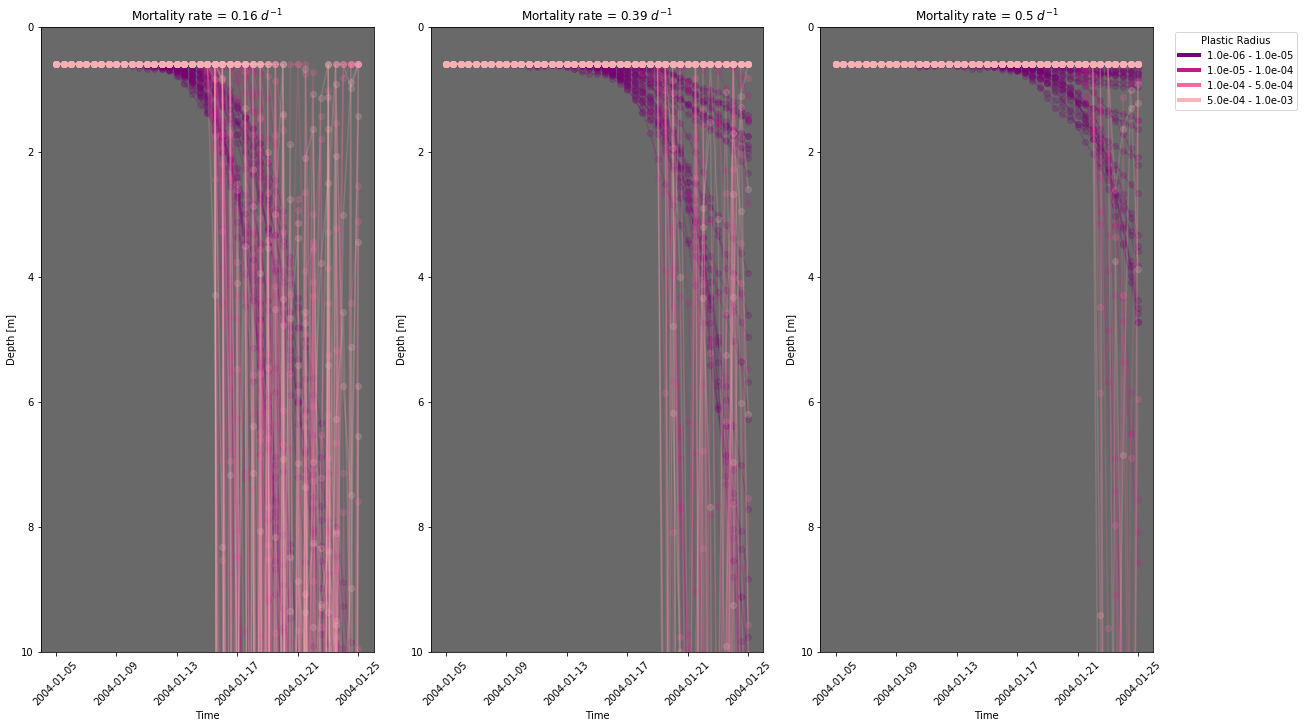

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,10), constrained_layout=True)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:25], r[1]['z'].T[:,:25], marker='o', markersize=6 ,c=r_pl_cmap[i], alpha=0.2)
ax1.set_facecolor('dimgray')
ax1.set_ylim(10,0)
ax1.set_title('Mortality rate = '+str(mortality[0]) + ' $d^{-1}$')
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:25], r[1]['z'].T[:,:25], marker='o', markersize=6 , c=r_pl_cmap[i], alpha=0.2)
ax2.set_facecolor('dimgray')
ax2.set_ylim(10,0)
ax2.set_title('Mortality rate = '+str(mortality[1]) + ' $d^{-1}$')
ax2.set_ylabel('Depth [m]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,:25], r[1]['z'].T[:,:25], marker='o', markersize=6 ,c=r_pl_cmap[i], alpha=0.2)
ax3.set_facecolor('dimgray')
ax3.set_ylim(10,0)
ax3.set_title('Mortality rate = '+str(mortality[2]) + ' $d^{-1}$')
ax3.set_ylabel('Depth [m]')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

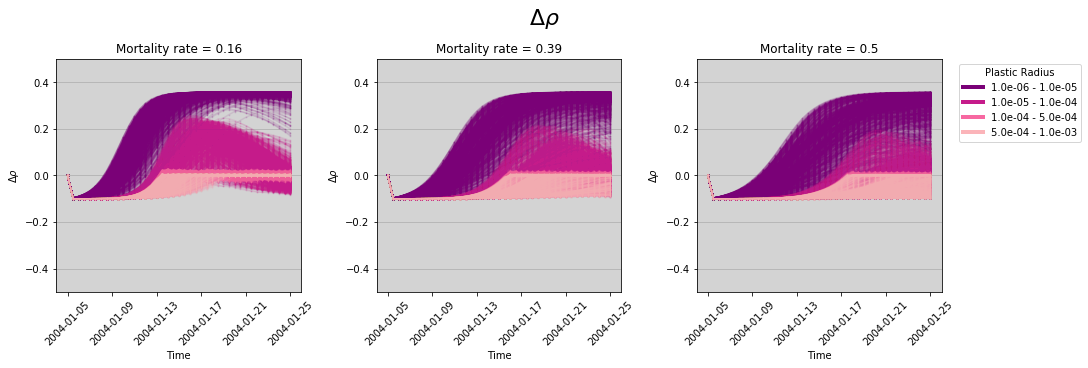

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('$\\Delta \\rho$', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], r[1]['delta_rho'].T[:,:n_plt], marker='o', markersize=1,c=r_pl_cmap[i], alpha = 0.1)
ax1.set_facecolor('lightgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Mortality rate = '+str(mortality[0]))
ax1.set_ylabel('$\\Delta \\rho$')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-0.5,0.5)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:n_plt], r[1]['delta_rho'].T[:,:n_plt], marker='o', markersize=1, c=r_pl_cmap[i], alpha = 0.1)
ax2.set_facecolor('lightgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Mortality rate = '+str(mortality[1]))
ax2.set_ylabel('$\\Delta \\rho$')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-0.5,0.5)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,:n_plt], r[1]['delta_rho'].T[:,:n_plt], marker='o', markersize=1,c=r_pl_cmap[i], alpha = 0.1)
ax3.set_facecolor('lightgray')
ax3.grid(b=True, axis='y')
ax3.set_title('Mortality rate = '+str(mortality[2]))
ax3.set_ylabel('$\\Delta \\rho$')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylim(-0.5,0.5)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('Attached algae', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:100], r[1]['a'].T[:,:100], marker='o', markersize=1,c=r_pl_cmap[i], alpha=1)
ax1.set_facecolor('lightgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Mortality rate = '+str(mortality[0]) + ' $d^{-1}$')
ax1.set_ylabel('Attached Algae [no. m-2]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-1e3,6e7)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:100], r[1]['a'].T[:,:100], marker='o', markersize=1, c=r_pl_cmap[i], alpha=1)
ax2.set_facecolor('lightgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Mortality rate = '+str(mortality[1]) + ' $d^{-1}$')
ax2.set_ylabel('Attached Algae [no. m-2]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-1e3,6e7)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,:100], r[1]['a'].T[:,:100], marker='o', markersize=1,c=r_pl_cmap[i], alpha=1)
ax3.set_facecolor('lightgray')
ax3.grid(b=True, axis='y')
ax3.set_title('Mortality rate = '+str(mortality[2]) + ' $d^{-1}$')
ax3.set_ylabel('Attached Algae [no. m-2]')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylim(-1e3,6e7)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

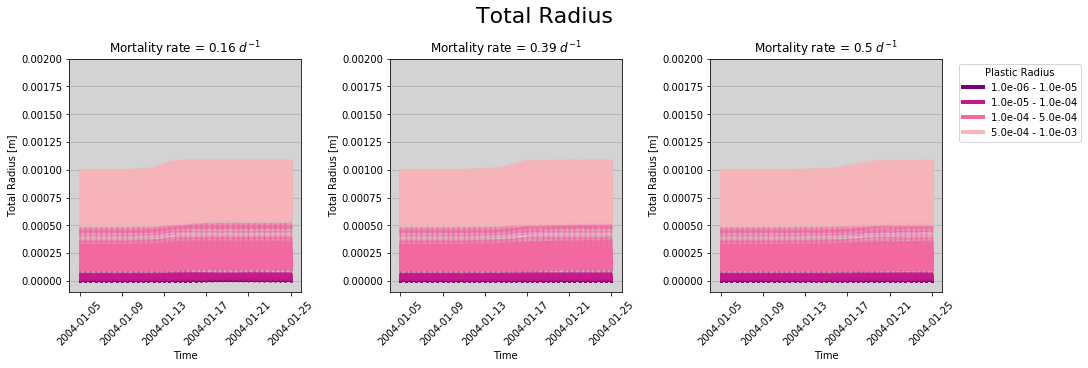

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('Total Radius', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T, r[1]['r_tot'].T, marker='o', markersize=1,c=r_pl_cmap[i], alpha=0.2)
ax1.set_facecolor('lightgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Mortality rate = '+str(mortality[0]) + ' $d^{-1}$')
ax1.set_ylabel('Total Radius [m]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-1e-4,2e-3)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T, r[1]['r_tot'].T, marker='o', markersize=1, c=r_pl_cmap[i], alpha=0.2)
ax2.set_facecolor('lightgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Mortality rate = '+str(mortality[1]) + ' $d^{-1}$')
ax2.set_ylabel('Total Radius [m]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-1e-4,2e-3)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T, r[1]['r_tot'].T, marker='o', markersize=1,c=r_pl_cmap[i], alpha=0.2)
ax3.set_facecolor('lightgray')
ax3.grid(b=True, axis='y')
ax3.set_title('Mortality rate = '+str(mortality[2]) + ' $d^{-1}$')
ax3.set_ylabel('Total Radius [m]')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylim(-1e-4,2e-3)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

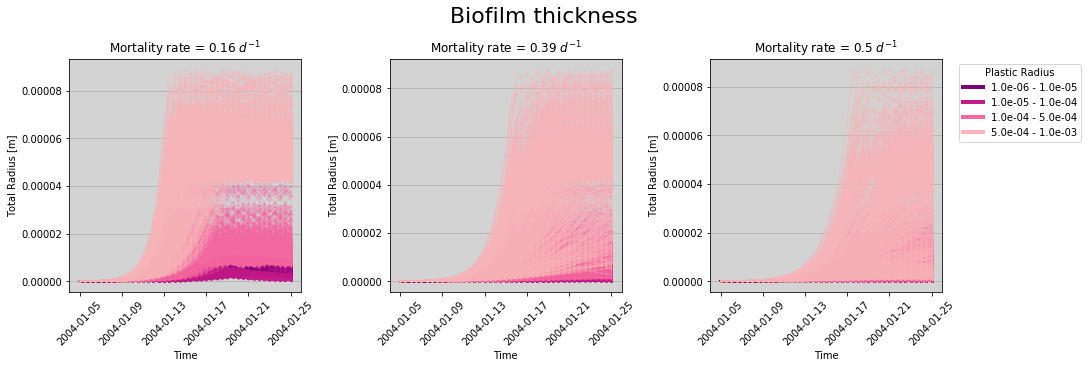

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('Biofilm thickness', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt], marker='o', markersize=1,c=r_pl_cmap[i], alpha=0.2)
ax1.set_facecolor('lightgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Mortality rate = '+str(mortality[0]) + ' $d^{-1}$')
ax1.set_ylabel('Total Radius [m]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
# ax1.set_ylim(-1e-3,1e-2)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:n_plt], r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt], marker='o', markersize=1, c=r_pl_cmap[i], alpha=0.2)
ax2.set_facecolor('lightgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Mortality rate = '+str(mortality[1]) + ' $d^{-1}$')
ax2.set_ylabel('Total Radius [m]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
# ax2.set_ylim(-1e-3,1e-2)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,:n_plt], r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt], marker='o', markersize=1,c=r_pl_cmap[i], alpha=0.2)
ax3.set_facecolor('lightgray')
ax3.grid(b=True, axis='y')
ax3.set_title('Mortality rate = '+str(mortality[2]) + ' $d^{-1}$')
ax3.set_ylabel('Total Radius [m]')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
# ax3.set_ylim(-1e-4,1e-2)

custom_lines = [Line2D([0], [0], color=r_pl_cmap[0], lw=4),
                Line2D([0], [0], color=r_pl_cmap[1], lw=4),
                Line2D([0], [0], color=r_pl_cmap[2], lw=4),
                Line2D([0], [0], color=r_pl_cmap[3], lw=4)]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()